# Proyecto Final
  
Usando la tabla de COVID19 del año 2022. [Lista de Ejercicios](https://github.com/scidatmath2020/CDD_Py_2022/blob/main/C3.2%20Proyecto%20final%20COVID19.ipynb)
  
En ella, entre otras cosas, se encuentran las columnas `ENTIDAD_RES`, `SEXO`, `FECHA_SINTOMAS`, `FECHA_DEF`, `EDAD` y `CLASIFICACION_FINAL` que se describen a continuación:

1. ENTIDAD_RES entidad de residencia de la persona. Se representa por los números 1, 2, 3, ..., 32.

2. SEXO sexo de la persona: 1 para mujer y 2 para hombre.

3. FECHA_SINTOMAS Identifica la fecha en que inició la sintomatología de la persona. Es una columna de tipo string.

4. FECHA_DEF Identifica la fecha en que el paciente falleció. Es una columna de tipo string y toma el valor '9999-99-99' si el paciente no falleció.

5. EDAD edad del paciente. Es una columna de tipo numérico.

6. CLASIFICACION_FINAL identifica si el paciente es un caso de COVID-19. Es una columna numérica y toma el valor 1, 2 o 3 en caso de ser positio.

Para este proyecto final, utilizarás siuba, siuba.dply.vector y plotnine, además de pandas y numpy.

Deberás resolver los siguientes ítems:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from siuba import *
from siuba.dply.vector import *
from plotnine import *

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos con Python/Curso_1/221227COVID19MEXICO.csv")
data.head() #Inicialmente tiene 40 columnas. Y 6,330,966 renglones.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-12-27,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-12-27,0989f5,2,12,14,1,32,14,71,1,...,2,2,97,1,1,3,99,México,97,97
2,2022-12-27,01e27d,2,9,25,2,25,25,1,1,...,2,2,97,1,2,7,99,México,97,97
3,2022-12-27,180725,2,9,9,2,9,9,12,2,...,2,2,97,1,2,7,99,México,97,2
4,2022-12-27,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97


In [ ]:
# Como la tabla es muy grande, quédate únicamente con las columnas
# ENTIDAD_RES, SEXO, FECHA_SINTOMAS, FECHA_DEF, EDAD y CLASIFICACION_FINAL
data = data >> select(_.ENTIDAD_RES, _.SEXO, _.FECHA_SINTOMAS, _.FECHA_DEF, _.EDAD, _.CLASIFICACION_FINAL)
data

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL
0,20,2,2022-06-21,9999-99-99,28,7
1,14,1,2022-08-06,9999-99-99,57,3
2,25,2,2022-02-14,9999-99-99,81,7
3,9,2,2022-01-17,9999-99-99,33,7
4,9,2,2022-05-03,9999-99-99,43,7
...,...,...,...,...,...,...
6330961,15,2,2022-12-22,9999-99-99,54,6
6330962,15,2,2022-12-22,9999-99-99,39,3
6330963,15,2,2022-12-22,9999-99-99,21,6
6330964,15,1,2022-12-23,9999-99-99,37,6


In [ ]:
# Crea una tabla llamada covid_confirmados donde se encuentren
# todos los pacientes que hayan dado positivo al virus. A partir de ahora 
#y hasta el final trabajarás con esta tabla
covid_confirmados = data >> filter((_.CLASIFICACION_FINAL == 1) | 
                                   (_.CLASIFICACION_FINAL == 2) | 
                                   (_.CLASIFICACION_FINAL == 3))
covid_confirmados

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL
1,14,1,2022-08-06,9999-99-99,57,3
13,22,1,2022-01-24,9999-99-99,34,3
15,22,1,2022-07-20,9999-99-99,54,3
19,18,1,2022-02-05,9999-99-99,24,3
22,9,2,2022-02-13,2022-02-21,54,2
...,...,...,...,...,...,...
6330898,15,2,2022-12-19,9999-99-99,0,3
6330902,15,2,2022-12-19,9999-99-99,64,3
6330913,15,1,2022-12-20,9999-99-99,40,3
6330918,15,1,2022-12-21,9999-99-99,70,3


In [ ]:
# Crea una columna llamada FALLECIMIENTO que valga 0 si el paciente no falleció y 1 si el paciente falleció,
# y cambia cada valor "9999-99-99" de la columna FECHA_DEF por None
covid_confirmados = covid_confirmados >> mutate(FALLECIMIENTO = np.where(_.FECHA_DEF == "9999-99-99", 0, 1))          #0 si el paciente fallecio, 1 si sí.
covid_confirmados = covid_confirmados.replace({"9999-99-99": None})  #Cambio todos los "9999-99-99" por  None
covid_confirmados

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO
1,14,1,2022-08-06,None,57,3,0
13,22,1,2022-01-24,None,34,3,0
15,22,1,2022-07-20,None,54,3,0
19,18,1,2022-02-05,None,24,3,0
22,9,2,2022-02-13,2022-02-21,54,2,1
...,...,...,...,...,...,...,...
6330898,15,2,2022-12-19,None,0,3,0
6330902,15,2,2022-12-19,None,64,3,0
6330913,15,1,2022-12-20,None,40,3,0
6330918,15,1,2022-12-21,None,70,3,0


In [ ]:
# En pandas existe un método para convertir columnas de tipo texto a columnas de tipo fecha.
# Si tu columna de texto se llama MI_COLUMNA, entonces MI_COLUMNA.astype("datetime64[ns]") te devuelve los mismos valores
# pero considerados como fechas.

### Ejemplo: Si tienes un dataframe MI_DATA con una columna de textos MI_COLUMNA cuyos valores se pueden representar por 
### fechas, entonces MI_DATA = MI_DATA >> mutate(MI_COLUMNA = _.MI_COLUMNA.astype("datetime64[ns]")) es el mismo dataframe
### pero ahora la columna MI_COLUMNA ya no tiene datos tipo texto, sino tipo fecha
covid_confirmados = covid_confirmados >> mutate(FECHA_SINTOMAS = _.FECHA_SINTOMAS.astype("datetime64[ns]"))
covid_confirmados

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO
1,14,1,2022-08-06,None,57,3,0
13,22,1,2022-01-24,None,34,3,0
15,22,1,2022-07-20,None,54,3,0
19,18,1,2022-02-05,None,24,3,0
22,9,2,2022-02-13,2022-02-21,54,2,1
...,...,...,...,...,...,...,...
6330898,15,2,2022-12-19,None,0,3,0
6330902,15,2,2022-12-19,None,64,3,0
6330913,15,1,2022-12-20,None,40,3,0
6330918,15,1,2022-12-21,None,70,3,0


In [ ]:
# Encuentra la menor y mayor fecha de la columna FECHA_SINTOMAS (es buena idea utilizar un arrange).
#Respuesta: Mayor fecha es el 26 de diciembre, mientras que la menor fecha es del primero de enero (ambos del 2022).
covid_confirmados >> arrange(-_.FECHA_SINTOMAS) 

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO
6252789,9,2,2022-12-26,None,35,3,0
6252944,15,2,2022-12-26,None,50,3,0
6253057,30,1,2022-12-26,None,39,3,0
6253173,27,2,2022-12-26,None,28,3,0
6253244,9,2,2022-12-26,None,66,3,0
...,...,...,...,...,...,...,...
6287724,15,2,2022-01-01,None,13,3,0
6294500,15,1,2022-01-01,None,28,3,0
6321081,15,1,2022-01-01,None,32,3,0
6325842,15,1,2022-01-01,None,61,3,0


In [ ]:
# En el periodo de fechas que comprende la tabla covid_confirmados, ¿cuántos contagiados hubo? Ayuda: la respuesta
# empieza con 3 y termina con 5
#Respuesta: Ya que la tabla de covid_confirmados solo contiene los casos de las personas confirmadas del virus,
#la respuesta es el número de renglones que tiene esta tabla, es decir, 3,138,715
total_confirmados = covid_confirmados >> n(_)
total_confirmados

3138715

In [ ]:
# ¿Cuántas muertes hubo en ese periodo de tiempo? ¿qué porcentaje representa el total de muertes respecto del total
# de enfermos?
# Sugerencia: utiliza la columna FALLECIMIENTO y un summarize para responder ambas preguntas
covid_confirmados >> group_by(_.FALLECIMIENTO) >> summarize(total = n(_)) >> mutate(per = _.total*100/total_confirmados)

,FALLECIMIENTO,total,per
0,0,3113527,99.197506
1,1,25188,0.802494



En la sección data del repositorio encontrarás un csv llamado catalogo_entidades.csv. Léelo pero toma en cuenta que hay palabras con acentos, por lo cual utilizarás el parámetro encoding="latin-1" dentro de tu pd.read_csv()

Este csv tiene tres columnas:

1. `ENTIDAD_RES` es el código numérico de las entidades: 1, 2, 3, ..., 32.

2. `ENTIDAD_FEDERATIVA` es el nombre completo de las entidades.

3. `ENTIDAD_ABREVIATURA` es la abreviatura del nombre de las entidades.

In [ ]:
catalogo_entidades = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos con Python/Curso_1/catalogo_entidades.csv", 
                                 encoding = "latin-1")
catalogo_entidades.head()

,ENTIDAD_RES,ENTIDAD_FEDERATIVA,ENTIDAD_ABREVIATURA
0,1,Aguascalientes,AS
1,2,Baja California,BC
2,3,Baja California Sur,BS
3,4,Campeche,CC
4,5,Coahuila De Zaragoza,CL


In [ ]:
# Lleva toda la información de catalogo_entidades hacia covid_confirmados, de modo que en 
#covid_confirmados tengas las columnas de las abreviaciones y nombres de cada entidad.
covid_confirmados = covid_confirmados >> left_join(_,catalogo_entidades, on = "ENTIDAD_RES") #No correr más de una vez, para impedir duplicar columnas.
covid_confirmados

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO,ENTIDAD_FEDERATIVA,ENTIDAD_ABREVIATURA
0,14,1,2022-08-06,None,57,3,0,Jalisco,JC
1,22,1,2022-01-24,None,34,3,0,Querétaro,QT
2,22,1,2022-07-20,None,54,3,0,Querétaro,QT
3,18,1,2022-02-05,None,24,3,0,Nayarit,NT
4,9,2,2022-02-13,2022-02-21,54,2,1,Ciudad De México,DF
...,...,...,...,...,...,...,...,...,...
3138710,15,2,2022-12-19,None,0,3,0,México,MC
3138711,15,2,2022-12-19,None,64,3,0,México,MC
3138712,15,1,2022-12-20,None,40,3,0,México,MC
3138713,15,1,2022-12-21,None,70,3,0,México,MC


In [ ]:
#Para eliminar las columnas que se puedan duplicar por accidente en la intrucción anterior
#covid_confirmados.drop(["ENTIDAD_FEDERATIVA_x", "	ENTIDAD_ABREVIATURA_x"], axis = 1)  

* Realiza un gráfico de barras donde se represente el total de contagiados en cada entidad. 

In [ ]:
covid_confirmados_x_entidad = covid_confirmados >> group_by(_.ENTIDAD_ABREVIATURA) >> summarize(Total = n(_))
covid_confirmados_x_entidad.head()

,ENTIDAD_ABREVIATURA,Total
0,AS,45648
1,BC,75515
2,BS,60561
3,CC,19397
4,CH,85739


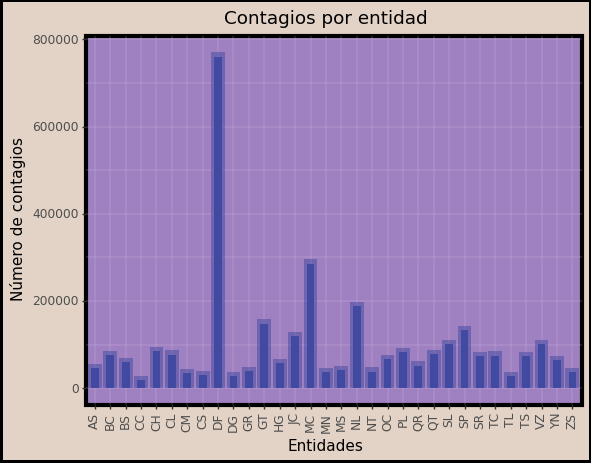

<ggplot: (8756683803130)>

In [ ]:
(ggplot() + geom_col(data = covid_confirmados_x_entidad, 
                     mapping = aes(x = "ENTIDAD_ABREVIATURA", y = "Total"), 
                     fill = "#4149a0", width = 0.5) + 
            geom_col(data = covid_confirmados_x_entidad, 
                     mapping = aes(x = "ENTIDAD_ABREVIATURA", y = "Total + 10000"), 
                     fill = "#4149a0", size = 1, alpha = 0.5) +
 
            theme(panel_background = element_rect("#9f81c1"),
                  panel_grid = element_line(color = "#e5c5e7", size = 0.2),
                  axis_text_x = element_text(rotation = 90),
                  rect = element_rect(color = "black", size = 3, fill = "#E3D3C6")) + 
            
            labs(x = "Entidades", y = "Número de contagios", title = "Contagios por entidad")
) 

* Obtén la siguiente tabla, la cual muestra las 10 entidades con más contagios ordenadas de mayor a menor, con el número de contagios y el lugar de la Entidad (1 para la de mas contagios y 10 para la décima con mas contagios)


|Lugar	|Entidad_Federativa	|Total          |
|-------|-------------------|---------------|
|1|	Ciudad De México|	760028                |
|2|	México|	285278                          |
|3|	Nuevo León|	188467                      |
|4|	Guanajuato|	148406                      |
|5|	San Luis Potosí|	133254                |
|6|	Jalisco|	119313                        |
|7|	Veracruz De Ignacio De La Llave|	101444|
|8|	Sinaloa|	101123                        |
|9|	Chihuahua|	85739                       |
|10|	Puebla|	83482                         |

In [ ]:
primeros_diez = covid_confirmados >> group_by(_.ENTIDAD_FEDERATIVA) >> summarize(Total = n(_)) >> arrange(-_.Total) >> head(10)
primeros_diez.index = [i for i in range(1,11)]
primeros_diez

,ENTIDAD_FEDERATIVA,Total
1,Ciudad De México,760028
2,México,285278
3,Nuevo León,188467
4,Guanajuato,148406
5,San Luis Potosí,133254
6,Jalisco,119313
7,Veracruz De Ignacio De La Llave,101444
8,Sinaloa,101123
9,Chihuahua,85739
10,Puebla,83482


* Obtén la siguiente tabla, la cual muestra las 10 entidades con más muertes ordenadas de mayor a menor, con el número de muertes y el lugar de la Entidad (1 para la de mas muertes y 10 para la décima con mas muertes)


|Lugar	|Entidad_Federativa	|Total|
|-------|-------------------|-----|
|1|Ciudad De México|2827|
|2|	México	|2434|
|3|	Jalisco	|2008|
|4|	Nuevo León	|1525|
|5|	Guanajuato	|1312|
|6|	Veracruz De Ignacio De La Llave	|1174|
|7|	Chihuahua	|1050|
|8|	Tamaulipas	|1037|
|9|	Coahuila De Zaragoza	|992|
|10|	Baja California	|954|

In [ ]:
primeros_diez_f = (covid_confirmados >> group_by(_.ENTIDAD_FEDERATIVA) >> summarize(Total = _.FALLECIMIENTO.sum()) >> 
                   arrange(-_.Total) >> head(10))
primeros_diez_f.index = [i for i in range(1,11)]
primeros_diez_f

,ENTIDAD_FEDERATIVA,Total
1,Ciudad De México,2827
2,México,2434
3,Jalisco,2008
4,Nuevo León,1525
5,Guanajuato,1312
6,Veracruz De Ignacio De La Llave,1174
7,Chihuahua,1050
8,Tamaulipas,1037
9,Coahuila De Zaragoza,992
10,Baja California,954


* Al observar ambas tablas, ¿qué puedes deducir?

El enlistado, de mayor a menor, se conservo con respecto a las entidades federativas que más contagios obtuvierón con las entidades con mayores muertes, es decir, en donde hubo mayores contagio, también hubo mayores fallecimientos.

* Realiza un gráfico de barras donde se represente el total de contagiados en cada entidad segregados por sexo. El gráfico debe verse así (puedes variar el fondo y los colores), pero toma en cuenta que la gráfica debe ser llamativa.

In [ ]:
covid_confirmados_x_sexo = covid_confirmados >> group_by(_.ENTIDAD_ABREVIATURA, _.SEXO) >> summarize(Total = n(_))
covid_confirmados_x_sexo

,ENTIDAD_ABREVIATURA,SEXO,Total
0,AS,1,26055
1,AS,2,19593
2,BC,1,43664
3,BC,2,31851
4,BS,1,33027
...,...,...,...
59,VZ,2,44201
60,YN,1,34420
61,YN,2,30291
62,ZS,1,20691


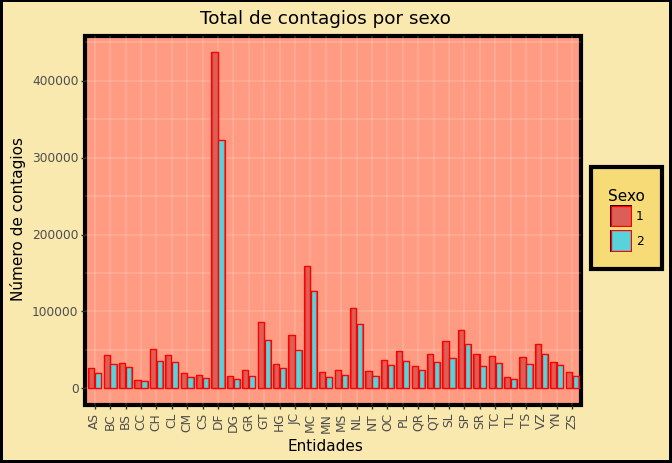

<ggplot: (8756681089771)>

In [ ]:
(ggplot() +  geom_col(data = covid_confirmados_x_sexo, 
                      mapping = aes(x = "ENTIDAD_ABREVIATURA", y = "Total", 
                                    fill = "SEXO.astype('string')"), position = "dodge2", color = "red", width = 0.8) +
             geom_col(data = covid_confirmados_x_sexo, 
                      mapping = aes(x = "ENTIDAD_ABREVIATURA", y = "Total", 
                                    fill = "SEXO.astype('string')"), position = "dodge2", color = "red", alpha = 0.5) +
 
            theme(panel_background = element_rect("#ff9b82"),
                  panel_grid = element_line(color = "#ffffff", size = 0.2),
                  axis_text_x = element_text(rotation = 90),
                  rect = element_rect(color = "black", size = 3, fill = "#EEBB0050"),
                  legend_title_align = "center") +

            labs(x = "Entidades", y = "Número de contagios", 
                 title = "Total de contagios por sexo", fill = "Sexo")
)

* Realiza un gráfico de líneas donde se represente el total de contagiados diariamente. El gráfico debe verse así (puedes variar el fondo y los colores), pero toma en cuenta que la gráfica debe ser llamativa.

In [ ]:
covid_confirmados_x_fecha = covid_confirmados >> group_by(_.FECHA_SINTOMAS) >> summarize(Total = n(_)) >> arrange(_.FECHA_SINTOMAS)
covid_confirmados_x_fecha.head() 

,FECHA_SINTOMAS,Total
0,2022-01-01,27252
1,2022-01-02,28013
2,2022-01-03,42382
3,2022-01-04,37308
4,2022-01-05,40521


In [ ]:
covid_confirmados_x_fecha >> arrange(-_.Total) >> head(2) >> mutate(fecha = ["10 de enero", "17 de enero"])

,FECHA_SINTOMAS,Total,fecha
9,2022-01-10,80556,10 de enero
16,2022-01-17,70118,17 de enero


In [ ]:
covid_confirmados_x_fecha >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1) >> mutate(fecha = ["11 de julio"])

,FECHA_SINTOMAS,Total,fecha
191,2022-07-11,38892,11 de julio


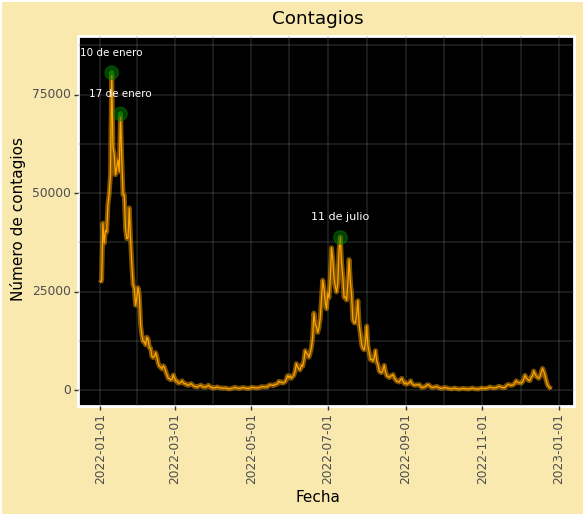

<ggplot: (8756681089663)>

In [ ]:
(ggplot() + geom_line(data = covid_confirmados_x_fecha, 
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "orange", size= 2, alpha = 0.5) +
            geom_line(data = covid_confirmados_x_fecha, 
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "orange") + 
            geom_point(data = covid_confirmados_x_fecha >> arrange(-_.Total) >> head(2),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 5, alpha = 0.5) + 
            geom_point(data = covid_confirmados_x_fecha >> arrange(-_.Total) >> head(2),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 1) +
            geom_point(data = covid_confirmados_x_fecha >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 5, alpha = 0.5) + 
            geom_text(data = covid_confirmados_x_fecha >> arrange(-_.Total) >> head(2) >> mutate(fecha = ["10 de enero", "17 de enero"]),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total + 5000", label = "fecha"), color = "white", size = 7.5) + 
            geom_text(data = covid_confirmados_x_fecha >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1) >> mutate(fecha = ["11 de julio"]),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total + 5000", label = "fecha"), color = "white", size = 8) + 
 
            labs(x = "Fecha", y = "Número de contagios", title = "Contagios") +
 
            theme(
                axis_text_x = element_text(rotation = 90),
                panel_background = element_rect("black"),
                panel_grid = element_line(color = "gray", size = 0.3),
                rect = element_rect(color = "white", size = 2, fill = "#EEBB0050")
            )
)

* Realiza un gráfico de líneas donde se represente el total de muertes diariamente. El gráfico debe verse así (puedes variar el fondo y los colores), pero toma en cuenta que la gráfica debe ser llamativa.


In [ ]:
covid_confirmados_x_fecha_f = covid_confirmados >> group_by(_.FECHA_SINTOMAS) >> summarize(Total = _.FECHA_DEF.count()) >> arrange(_.FECHA_SINTOMAS)
covid_confirmados_x_fecha_f

In [ ]:
covid_confirmados_x_fecha_f >> arrange(-_.Total) >> head(2) >> mutate(fecha = ["20 de enero", "17 de enero"])

,FECHA_SINTOMAS,Total,fecha
19,2022-01-20,808,20 de enero
16,2022-01-17,627,17 de enero


In [ ]:
covid_confirmados_x_fecha_f >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1) >> mutate(fecha = ["20 de julio"])

,FECHA_SINTOMAS,Total,fecha
200,2022-07-20,126,20 de julio


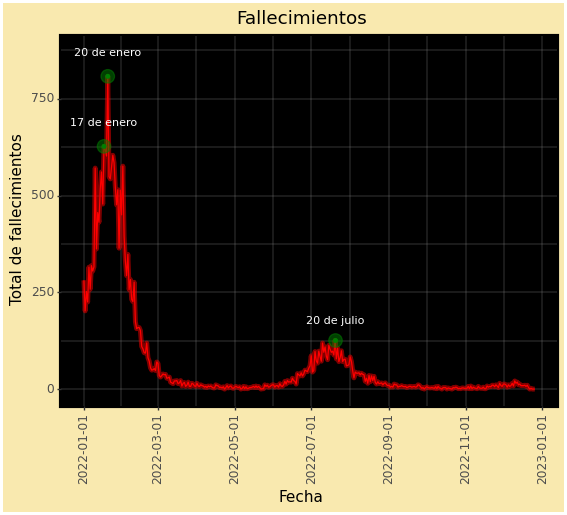

<ggplot: (8756681109622)>

In [ ]:
(ggplot() + geom_line(data = covid_confirmados_x_fecha_f, 
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "red", size = 2, alpha = 0.5) +
            geom_line(data = covid_confirmados_x_fecha_f, 
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "red") +
            #Primeros dos puntos máximos:
            geom_point(data = covid_confirmados_x_fecha_f >> arrange(-_.Total) >> head(2),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 5, alpha = 0.5)+
            geom_point(data = covid_confirmados_x_fecha_f >> arrange(-_.Total) >> head(2),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 1)+ 
            geom_text(data = covid_confirmados_x_fecha_f >> arrange(-_.Total) >> head(2) >> mutate(fecha = ["20 de enero", "17 de enero"]),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total + 60", label = "fecha"), color = "white", size = 8) +
            #Tercer punto máximo:
            geom_point(data = covid_confirmados_x_fecha_f >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 5, alpha = 0.5)+
            geom_point(data = covid_confirmados_x_fecha_f >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 1)+ 
            geom_text(data = covid_confirmados_x_fecha_f >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1) >> mutate(fecha = ["20 de julio"]),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total + 50", label = "fecha"), color = "white", size = 8) +
 
            labs(x = "Fecha", y = "Total de fallecimientos", title = "Fallecimientos") + 
 
            theme(
                axis_text_x = element_text(rotation = 90),
                panel_background = element_line("black"),
                panel_grid = element_line(color = "gray", size = 0.3),
                rect = element_rect(color = "white", size = 3, fill = "#EEBB0050")
            )
)

`siuba.dply.vector` tiene una función llamada cumsum(). Esta devuelve la suma de los valores acumulados de una columna en una tabla. Por ejemplo, si tienes la tabla `MI_TABLA` dada por

|col1	|col2|
|-----|----|
|dato 1	|1 |
|dato 2	|4 |
|dato 3	|8 |
|dato 4	|2 |

entonces `MI_TABLA >> mutate(suma_acumulada = _.col2.cumsum())` devuelve

|col1	|col2	|suma_acumulada|
|-----|-----|--------------|
|dato 1	|1	|1 |
|dato 2	|4	|5 |
|dato 3	|8	|13 |
|dato 4	|2	|15 |

Es decir, en cualquier renglón de suma_acumulada están los valores que se obtienen al sumar los renglones previos de col2: 1=1, 1+4=5, 1+4+8=13, 1+4+8+2=15.

* Realiza un gráfico de líneas donde se represente el total de muertes acumuladas diariamente. El gráfico debe verse así (puedes variar el fondo y los colores), pero toma en cuenta que la gráfica debe ser llamativa.

In [ ]:
covid_confirmados_acum_f =  (covid_confirmados >> group_by(_.FECHA_SINTOMAS) >> arrange(_.FECHA_SINTOMAS) >> 
                             summarize(Total = _.FECHA_DEF.count()) >>
                             mutate(acum_fallecimientos = _.Total.cumsum()) )
covid_confirmados_acum_f

/usr/local/lib/python3.8/dist-packages/siuba/dply/verbs.py:567: UserWarning: Grouped data passed to summarize must have dropna=False and group_keys=True. Regrouping with these arguments set.


,FECHA_SINTOMAS,Total,acum_fallecimientos
0,2022-01-01,281,281
1,2022-01-02,202,483
2,2022-01-03,252,735
3,2022-01-04,225,960
4,2022-01-05,315,1275
...,...,...,...
355,2022-12-22,0,25186
356,2022-12-23,2,25188
357,2022-12-24,0,25188
358,2022-12-25,0,25188


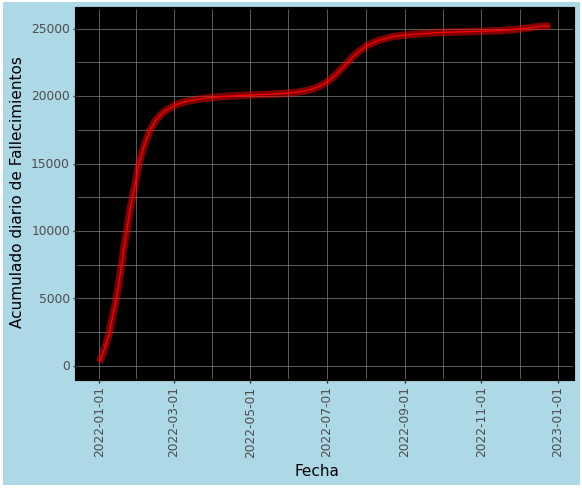

<ggplot: (8756680909117)>

In [ ]:
(ggplot() + geom_line(data = covid_confirmados_acum_f,
                      mapping = aes(x = "FECHA_SINTOMAS", y = "acum_fallecimientos"), 
                      color = "red", size = 3, alpha = 0.5) +
            geom_line(data = covid_confirmados_acum_f,
                      mapping = aes(x = "FECHA_SINTOMAS", y = "acum_fallecimientos"), 
                      color = "red") +
            labs(x = "Fecha", y = "Acumulado diario de Fallecimientos") + 
            theme(
                axis_text_x = element_text(rotation = 90),
                panel_background = element_line(color = "black"),
                panel_grid = element_line(color = "gray", size = 0.5),
                rect = element_rect(color = "white", size = 3, fill = "lightblue")))

* ¿Qué diferencias conceptuales encuentras entre las dos gráficas anteriores? ¿Cómo se relacionan ambas gráficas?
  
Sugerencia: piensa en áreas bajo curvas.
  
**Respuesta:** Como la segunda gráfica va acumulando los datos de la primera tabla, fecha por fecha (y de manera ordenada con respecto a la fecha), entonces cuando hay picos en la primera gráfica, en la segunda habrá un aumento drástico, mientras que si en la primera gráfica los picos son pequeños, o hay un número pequeño de fallecimientos, entonces en la segunda gráfica el aumento será poco perseptible, al final en la segunda gráfica siempre será no decreciente porque estará acumulando la suma de los valores de la gráfica 1 (que es la integral para cada intervalo que va aumentado).

* Realiza un gráfico de líneas donde se represente tanto el total de muertes como el total de muertes acumuladas diariamente. Es decir, un gráfico que muestre las dos curvas anteriores. El gráfico debe verse así (puedes variar el fondo y los colores), pero toma en cuenta que la gráfica debe ser llamativa.
  
Sugerencia: calcula con un mutate y un summarize el total de muertes y de muertes acumuladas, y luego aplica un gather para obtener una tabla con formato tidy donde se encuentre una columna que indique si el valor es el diario o el acumulado.



In [ ]:
#print(covid_confirmados_acum_f, covid_confirmados_x_fecha_f)
df1 = covid_confirmados_x_fecha_f
df2 = covid_confirmados_acum_f[["FECHA_SINTOMAS", "acum_fallecimientos"]] >> rename(Total = _.acum_fallecimientos)  
dff = pd.concat([df1, df2], axis = 0)
dff = dff.reset_index()
dff

,index,FECHA_SINTOMAS,Total
0,0,2022-01-01,281
1,1,2022-01-02,202
2,2,2022-01-03,252
3,3,2022-01-04,225
4,4,2022-01-05,315
...,...,...,...
715,355,2022-12-22,25186
716,356,2022-12-23,25188
717,357,2022-12-24,25188
718,358,2022-12-25,25188


In [ ]:
dff = dff >> mutate(Tipo = np.where(_.index<360, "Diario", "Acumulado"))

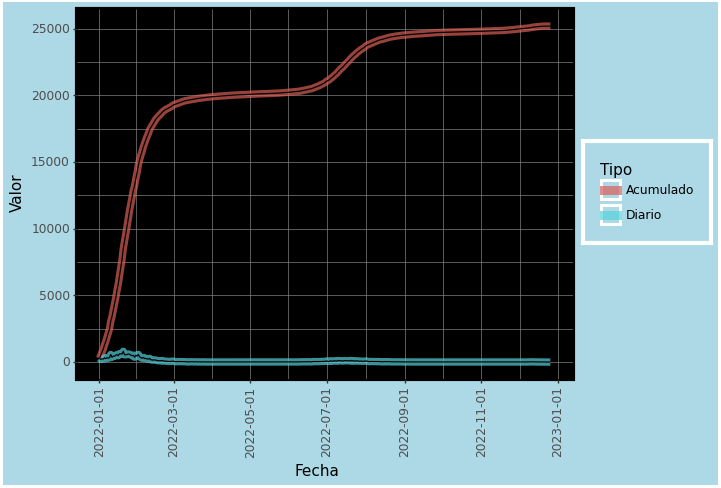

<ggplot: (8756677814282)>

In [ ]:
(ggplot() + geom_line(data = dff,
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total", color = "Tipo"),
                      size = 3, alpha = 0.7) +
            geom_line(data = dff,
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total", colro = "Tipo")) +

            labs(x = "Fecha", y = "Valor") +
            theme(
                axis_text_x = element_text(rotation = 90),
                panel_background = element_line(color = "black"),
                panel_grid = element_line(color = "gray", size = 0.5),
                rect = element_rect(color = "white", size = 3, fill = "lightblue")
            )
)

* Realiza un gráfico de cajas donde se muestren las edades de cada una de las 10 entidades con mas contagios, segregadas por valor de fallecimiento. El gráfico debe verse así (puedes variar el fondo y los colores), pero toma en cuenta que la gráfica debe ser llamativa.

In [ ]:
#covid_confirmados >> group_by(_.FALLECIMIENTO, _.ENTIDAD_ABREVIATURA, _.EDAD) >> mutate(Total = _.FECHA_SINTOMAS.count())
entidades_10 = (covid_confirmados >> group_by(_.ENTIDAD_FEDERATIVA) >> summarize(Total = _.EDAD.count()) >> arrange(-_.Total) >> head(10))["ENTIDAD_FEDERATIVA"]
covid_confirmados_box = covid_confirmados >> filter((_.ENTIDAD_FEDERATIVA == list(entidades_10)[0]) | (_.ENTIDAD_FEDERATIVA == list(entidades_10)[1]) |
                                                    (_.ENTIDAD_FEDERATIVA == list(entidades_10)[2]) | (_.ENTIDAD_FEDERATIVA == list(entidades_10)[3]) |
                                                    (_.ENTIDAD_FEDERATIVA == list(entidades_10)[4]) | (_.ENTIDAD_FEDERATIVA == list(entidades_10)[5]) |
                                                    (_.ENTIDAD_FEDERATIVA == list(entidades_10)[6]) | (_.ENTIDAD_FEDERATIVA == list(entidades_10)[7]) |
                                                    (_.ENTIDAD_FEDERATIVA == list(entidades_10)[8]) | (_.ENTIDAD_FEDERATIVA == list(entidades_10)[9]))
covid_confirmados_box

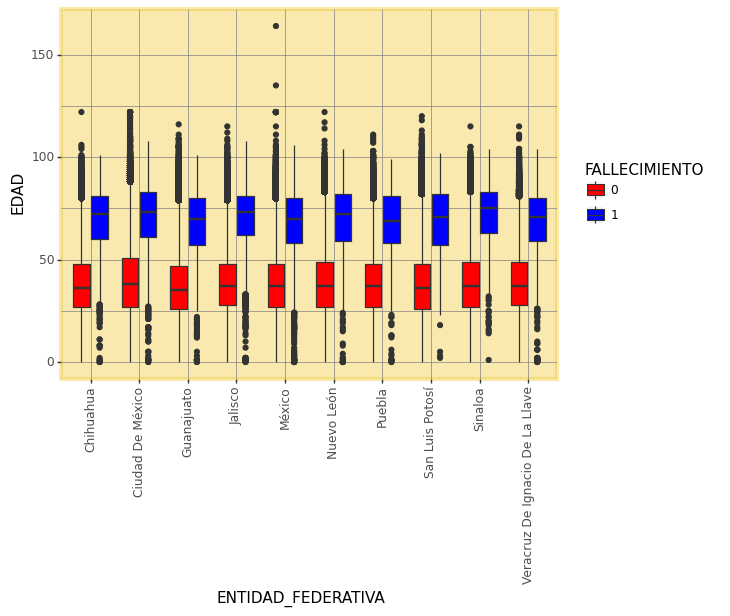

<ggplot: (8756676753375)>

In [ ]:
(ggplot() + geom_boxplot(data = covid_confirmados_box, 
                         mapping = aes(x = "ENTIDAD_FEDERATIVA", y = "EDAD", fill = "FALLECIMIENTO.astype('string')")) + 
            scale_fill_manual(values = ["red", "blue"]) + 
            theme(
                  axis_text_x = element_text(rotation = 90),
                  panel_background = element_line(color = "#EEBB0050"),
                  panel_grid = element_line(color = "gray", size = 0.5),
                  rect = element_rect(color = "white", size = 3)
                         ) + 
            labs(fill = "FALLECIMIENTO")
)

* En general, ¿qué puedes decir sobre la edad de la mitad de las personas que fallecieron en cada entidad?
  



En la sección data del repositorio encontrarás un csv llamado Mexico_division_politica.csv.

Este csv tiene tres columnas:

`Longitud`, `Latitud` son coordenadas geográficas.

`Grupo` en la sesión final se les explicó el significado de esta columna en los csv de mapas.

In [ ]:
M_d_p = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos con Python/Curso_1/Mexico_division_politica.csv")
M_d_p.head()

,Longitud,Latitud,Grupo
0,-102.266047,22.403721,1.1
1,-102.264885,22.400197,1.1
2,-102.250299,22.387222,1.1
3,-102.252053,22.374353,1.1
4,-102.228133,22.374681,1.1


* Agrega una columna a este dataframe llamada ENTIDAD_RES que contenga la clave de la entidad. Por ejemplo, si el grupo es 3.1 entonces la entidad es 3. Llama mapa al dataframe obtenido, el cual tendrá cuatro columnas.
  
Sugerencia. Si col1 es una columna formada por números con decimales, entonces col1.astype.("int") elimina los decimales. Ahora, procede como cuando convertiste las columnas de texto a fecha en la tabla de covid_confirmados.

In [ ]:
mapa = M_d_p >> mutate(ENTIDAD_RES = _.Grupo.astype("int"))
mapa

,Longitud,Latitud,Grupo,ENTIDAD_RES
0,-102.266047,22.403721,1.1,1
1,-102.264885,22.400197,1.1,1
2,-102.250299,22.387222,1.1,1
3,-102.252053,22.374353,1.1,1
4,-102.228133,22.374681,1.1,1
...,...,...,...,...
65177,-101.609012,24.789664,32.1,32
65178,-101.640767,24.800704,32.1,32
65179,-101.622270,24.758983,32.1,32
65180,-101.600407,24.754397,32.1,32


* Toma en cuenta que en la tabla mapa del punto anterior, las entidades están en la columna ENTIDAD_RES. De la tabla covid_confirmados calcula el total de contagiados y total de muertes en cada entidad agrupando de manera conveniente, y lleva esa información a mapa, de tal manera que ahora esta tabla tenga seis columnas. Llama mapa_final a esta tabla.
  

In [ ]:
tabla = (covid_confirmados >> group_by(_.ENTIDAD_RES) >> 
         summarize(Total_contagios = _.FECHA_SINTOMAS.count(), Total_fallecimientos = _.FECHA_DEF.count()))
mapa_final = mapa >> inner_join(_,tabla, on = "ENTIDAD_RES")
mapa_final

,Longitud,Latitud,Grupo,ENTIDAD_RES,Total_contagios,Total_fallecimientos
0,-102.266047,22.403721,1.1,1,45648,409
1,-102.264885,22.400197,1.1,1,45648,409
2,-102.250299,22.387222,1.1,1,45648,409
3,-102.252053,22.374353,1.1,1,45648,409
4,-102.228133,22.374681,1.1,1,45648,409
...,...,...,...,...,...,...
65177,-101.609012,24.789664,32.1,32,36435,420
65178,-101.640767,24.800704,32.1,32,36435,420
65179,-101.622270,24.758983,32.1,32,36435,420
65180,-101.600407,24.754397,32.1,32,36435,420


*b Explica por qué el siguiente mapa se genera con el código de abajo. Altera algunos colores o fondos para generar tus propios mapas:

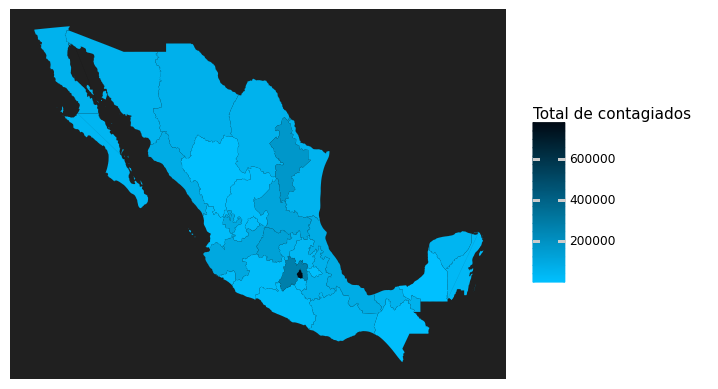

<ggplot: (8756683194489)>

In [ ]:
(ggplot() + 
 geom_polygon(data = mapa_final, #Usando los datoa del mapa_final para los datos de la gráfica
              mapping = aes(x="Longitud",y="Latitud",group="Grupo",fill="Total_contagios"), 
              color = "black", size = 0.01 ) + 
 scale_fill_gradient(low = "#00c0ff", high = "#000a14") + #El mapa de calor tendra los valores mínimos
 labs(fill="Total de contagiados") +                      #y máximos señalados (dos tipos de azul)
 #Lo siguiente es para modificar el color del fondo, así como el grid y el nombre de los ejes
 theme(panel_background = element_rect("#202020"), panel_grid = element_blank(), 
       axis_title = element_blank(), axis_text = element_blank(), axis_ticks = element_blank() ) 
) #Entre más oscuro el color azul, indentifica que hay una mayor cantidad de contagiados, según la entidad que esté

* Explica por qué el siguiente mapa se genera con el código de abajo. Altera algunos colores o fondos para generar tus propios mapas:

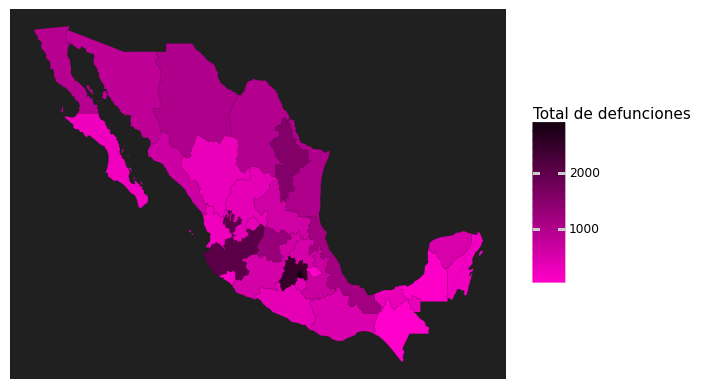

<ggplot: (8756682659831)>

In [ ]:
(ggplot() + 
 geom_polygon(data = mapa_final, 
              mapping = aes(x = "Longitud", y = "Latitud", group = "Grupo", fill = "Total_fallecimientos"),
              color = "black", size = 0.01) + 
 scale_fill_gradient(low = "#ff00ca", high = "#140010" ) + 
 labs(fill = "Total de defunciones") + 
 theme(panel_background = element_rect("#202020"), 
       panel_grid = element_blank(), axis_title = element_blank(), 
       axis_text = element_blank(), axis_ticks = element_blank() ) 
)
#Entre más oscuro el color rosa, indentifica que hay una mayor cantidad de defunciones, según la entidad que esté

* Sé feliz.

## Datos extra

In [ ]:
covid_confirmado_df = covid_confirmados >> filter(_.ENTIDAD_ABREVIATURA == "DF")
covid_confirmado_df_x_fecha = covid_confirmado_df >> group_by(_.FECHA_SINTOMAS) >> summarize(Total = n(_)) >> arrange(_.FECHA_SINTOMAS)
covid_confirmado_df_x_fecha

,FECHA_SINTOMAS,Total
0,2022-01-01,6748
1,2022-01-02,6583
2,2022-01-03,10397
3,2022-01-04,9727
4,2022-01-05,10917
...,...,...
355,2022-12-22,840
356,2022-12-23,539
357,2022-12-24,288
358,2022-12-25,193


In [ ]:
covid_confirmado_df_x_fecha >> arrange(-_.Total) >> head(2) >> mutate(fecha = ["10 de enero", "17 de enero"])

,FECHA_SINTOMAS,Total,fecha
9,2022-01-10,19673,10 de enero
16,2022-01-17,16286,17 de enero


In [ ]:
covid_confirmado_df_x_fecha >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1) >> mutate(fecha = ["4 de julio"])

,FECHA_SINTOMAS,Total,fecha
184,2022-07-04,9832,4 de julio


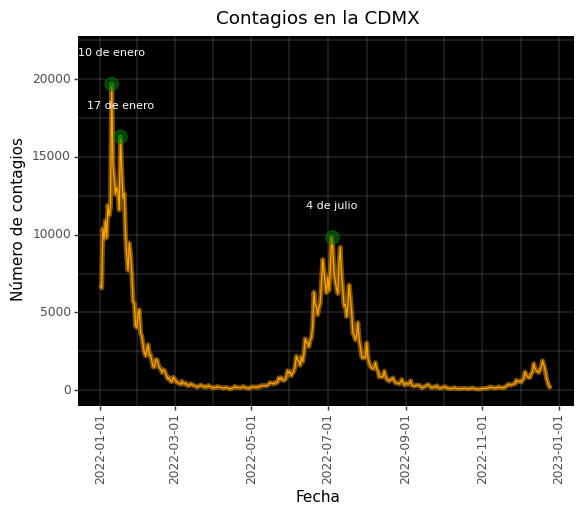

<ggplot: (8731562601159)>

In [ ]:
(ggplot() + geom_line(data = covid_confirmado_df_x_fecha, 
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "orange", size= 2, alpha = 0.5) +
            geom_line(data = covid_confirmado_df_x_fecha, 
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "orange") + 
            geom_point(data = covid_confirmado_df_x_fecha >> arrange(-_.Total) >> head(2),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 5, alpha = 0.5) + 
            geom_point(data = covid_confirmado_df_x_fecha >> arrange(-_.Total) >> head(2),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 1) +
            geom_point(data = covid_confirmado_df_x_fecha >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total"), color = "green", size = 5, alpha = 0.5) + 
            geom_text(data = covid_confirmado_df_x_fecha >> arrange(-_.Total) >> head(2) >> mutate(fecha = ["10 de enero", "17 de enero"]),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total + 2000", label = "fecha"), color = "white", size = 8) + 
            geom_text(data = covid_confirmado_df_x_fecha >> filter(_.FECHA_SINTOMAS > "2022-05-01") >> arrange(-_.Total) >> head(1) >> mutate(fecha = ["4 de julio"]),
                      mapping = aes(x = "FECHA_SINTOMAS", y = "Total + 2000", label = "fecha"), color = "white", size = 8) + 
            labs(x = "Fecha", y = "Número de contagios", title = "Contagios en la CDMX") +
            theme(
                axis_text_x = element_text(rotation = 90),
                panel_background = element_rect("black"),
                panel_grid = element_line(color = "gray", size = 0.3)
            )
)